# License
***
Copyright (C) 2017--2025 J. Patrick Hall, jphall@gwu.edu and N M Emran Hussain, nmemran.hussain@gwu.edu

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

## Installs and Imports

1. Standard Python imports and config

In [2]:
import pandas as pd # import pandas for easy data manipulation using data frames

from matplotlib import pyplot as plt # plotting
import numpy as np                   # basic array and matric handling

# to connect to drive
from google.colab import drive

SEED = 309 # seed for better reproducibility
np.random.seed() # REQUIRES STUDENT INPUT

# display matplotlib graphics in notebook
%matplotlib inline

2. Install Java

In [3]:
# DEPRECATED/do not run
# install Java for h2o backend
# !apt-get install default-jre
# !java -version

3. Install h2o

In [4]:
# install h2o
!pip install h2o

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 MB 6.2 MB/s eta 0:00:00


4. Import h2o package and required classes

In [5]:
# import h2o and required classes
import h2o
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from h2o.grid.grid_search import H2OGridSearch

5. Start h2o Server

In [6]:
# start and connect to h2o server
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.27" 2025-04-15; OpenJDK Runtime Environment (build 11.0.27+6-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.27+6-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp0tlfkc4l
  JVM stdout: /tmp/tmp0tlfkc4l/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp0tlfkc4l/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,2 months and 9 days
H2O_cluster_name:,H2O_from_python_unknownUser_ft6qt4
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


## Load example data

6. Upload class example data

In [7]:
drive.mount('/content/drive/', force_remount=True)
# MAY REQUIRE STUDENT INPUT
%cd /content/drive/MyDrive/AI_Workshop/01_Regression_Materials/
%ls

Mounted at /content/drive/
/content/drive/MyDrive/AI_Workshop/01_Regression_Materials
'Assignment 1.ipynb'   L2_gradient_descent.ipynb   loan_clean.csv


In [8]:
# 7
# DEPRECATED/do not run
# uploaded.keys() # what is stored in that Python object?

8. Covert to Pandas DataFrame

In [9]:
# convert data to Pandas DataFrame
raw = pd.read_csv('loan_clean.csv') # name in quotes here must match name above

9. Assign basic metadata (measurement level) for h2o

In [10]:
# define input feature measurement levels
# strings automatically parsed as enums (nominal/categorical)
# numbers automatically parsed as numeric
col_types = {'bad_loan': 'enum'}

10. Covert to h2o frame

In [11]:
hraw = h2o.H2OFrame(raw, column_types=col_types)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


11. Split into train, validation, and test partitions

In [12]:
# split into 40% training, 30% validation, and 30% test
train, valid, test = hraw.split_frame([0.4, 0.3], seed=SEED) # REQUIRES STUDENT INPUT

12. Assign basic metadata (modeling roles) for h2o

In [13]:
# assign target and inputs
y = 'bad_loan'
X = [name for name in train.columns if name not in ['id', '_WARN_', 'GRP_home_ownership', y]]
print(y)
print(X)

bad_loan
['GRP_REP_home_ownership', 'GRP_addr_state', 'GRP_purpose', 'GRP_verification_status', 'STD_IMP_REP_annual_inc', 'STD_IMP_REP_delinq_2yrs', 'STD_IMP_REP_dti', 'STD_IMP_REP_emp_length', 'STD_IMP_REP_int_rate', 'STD_IMP_REP_loan_amnt', 'STD_IMP_REP_longest_credit_lengt', 'STD_IMP_REP_revol_util', 'STD_IMP_REP_term_length', 'STD_IMP_REP_total_acc']


13. Double-check that h2o treats y as categorical

In [14]:
# set target to catgorical - for binary classification
train[y] = train[y].asfactor()
valid[y] = valid[y].asfactor()
test[y] = test[y].asfactor()

## Train ANN using random grid search

14. Conduct random grid search

In [30]:
# train ANN with random hyperparameter search
# train many different ANN models with random hyperparameters
# and select best model based on validation error
# train ANN with random hyperparameter search
# train many different ANN models with random hyperparameters
# and select best model based on validation error

# define random grid search parameters
hyper_parameters = {'hidden':[[170, 320], [80, 190], [320, 160, 80], [100], [50, 50, 50, 50]], # REQUIRES STUDENT INPUT
                    'l1':[s/1e4 for s in range(0, 1000, 100)],
                    'l2':[s/1e5 for s in range(0, 1000, 100)],
                    'input_dropout_ratio':[s/1e2 for s in range(0, 20, 2)]}

# define search strategy
# Change single quotes to double quotes for the 'strategy' value
search_criteria = {'strategy':"RandomDiscrete", # Use double quotes for the strategy string
                   'max_models': 20,
                   'max_runtime_secs': 1200,
                   'seed':SEED} # REQUIRES STUDENT INPUT

# initialize grid search
gsearch = H2OGridSearch(H2ODeepLearningEstimator,
                        hyper_params=hyper_parameters,
                        search_criteria=search_criteria)

# execute training w/ grid search
gsearch.train(x=X,
              y=y,
              training_frame=train,
              validation_frame=valid,
              reproducible=True, # force SGD to reproducible, but slow
              seed=SEED) # REQUIRES STUDENT INPUT

deeplearning Grid Build progress: |██████████████████████████████████████████████| (done) 100%


,hidden,input_dropout_ratio,l1,l2,model_ids,logloss
,100,0.06,0.0,0.002,Grid_DeepLearning_py_5_sid_b2c4_model_python_1749152904041_1_model_7,0.4571557
,100,0.02,0.01,0.001,Grid_DeepLearning_py_5_sid_b2c4_model_python_1749152904041_1_model_10,0.4587875
,"[50, 50, 50, 50]",0.16,0.05,0.005,Grid_DeepLearning_py_5_sid_b2c4_model_python_1749152904041_1_model_6,0.4864500
,"[80, 190]",0.1,0.05,0.008,Grid_DeepLearning_py_5_sid_b2c4_model_python_1749152904041_1_model_16,0.4864590
,"[50, 50, 50, 50]",0.18,0.05,0.0,Grid_DeepLearning_py_5_sid_b2c4_model_python_1749152904041_1_model_11,0.4864738
,"[50, 50, 50, 50]",0.0,0.04,0.008,Grid_DeepLearning_py_5_sid_b2c4_model_python_1749152904041_1_model_17,0.4866139
,"[50, 50, 50, 50]",0.06,0.06,0.002,Grid_DeepLearning_py_5_sid_b2c4_model_python_1749152904041_1_model_13,0.4866224
,"[320, 160, 80]",0.0,0.06,0.005,Grid_DeepLearning_py_5_sid_b2c4_model_python_1749152904041_1_model_18,0.4867018
,"[320, 160, 80]",0.14,0.04,0.004,Grid_DeepLearning_py_5_sid_b2c4_model_python_1749152904041_1_model_15,0.4867392
,"[170, 320]",0.14,0.04,0.004,Grid_DeepLearning_py_5_sid_b2c4_model_python_1749152904041_1_model_1,0.4867392


15. Display grid search results

In [31]:
# show grid search results
gsearch.show()

# select best model
best_ann = gsearch.get_grid()[0]

# print model information
best_ann

,hidden,input_dropout_ratio,l1,l2,model_ids,logloss
,100,0.06,0.0,0.002,Grid_DeepLearning_py_5_sid_b2c4_model_python_1749152904041_1_model_7,0.4571557
,100,0.02,0.01,0.001,Grid_DeepLearning_py_5_sid_b2c4_model_python_1749152904041_1_model_10,0.4587875
,"[50, 50, 50, 50]",0.16,0.05,0.005,Grid_DeepLearning_py_5_sid_b2c4_model_python_1749152904041_1_model_6,0.4864500
,"[80, 190]",0.1,0.05,0.008,Grid_DeepLearning_py_5_sid_b2c4_model_python_1749152904041_1_model_16,0.4864590
,"[50, 50, 50, 50]",0.18,0.05,0.0,Grid_DeepLearning_py_5_sid_b2c4_model_python_1749152904041_1_model_11,0.4864738
,"[50, 50, 50, 50]",0.0,0.04,0.008,Grid_DeepLearning_py_5_sid_b2c4_model_python_1749152904041_1_model_17,0.4866139
,"[50, 50, 50, 50]",0.06,0.06,0.002,Grid_DeepLearning_py_5_sid_b2c4_model_python_1749152904041_1_model_13,0.4866224
,"[320, 160, 80]",0.0,0.06,0.005,Grid_DeepLearning_py_5_sid_b2c4_model_python_1749152904041_1_model_18,0.4867018
,"[320, 160, 80]",0.14,0.04,0.004,Grid_DeepLearning_py_5_sid_b2c4_model_python_1749152904041_1_model_15,0.4867392
,"[170, 320]",0.14,0.04,0.004,Grid_DeepLearning_py_5_sid_b2c4_model_python_1749152904041_1_model_1,0.4867392


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: Grid_DeepLearning_py_5_sid_b2c4_model_python_1749152904041_1_model_7


Status of Neuron Layers: predicting bad_loan, 2-class classification, bernoulli distribution, CrossEntropy loss, 1,702 weights/biases, 27.0 KB, 657,460 training samples, mini-batch size 1
    layer    units    type       dropout    l1    l2     mean_rate             rate_rms              momentum    mean_weight            weight_rms           mean_bias               bias_rms
--  -------  -------  ---------  ---------  ----  -----  --------------------  --------------------  ----------  ---------------------  -------------------  ----------------------  -------------------
    1        14       Input      6.0
    2        100      Rectifier  0.0        0.0   0.002  0.17008589005717242   0.17295467853546143   0.0         0.0015200350420211959  0.04566948115825653  -0.024672106634243917   0.0944133996963501
    3        2        Softmax               0.0   0.002  0.039066983145894484  0.039958253502845764  0.0         0.0006620616042346228  0.14827758073806763  -0.0004228339749406673  0.39141905307769775

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.14011988333573155
RMSE: 0.3743259052426529
LogLoss: 0.4447649617724683
Mean Per-Class Error: 0.35606285710002655
AUC: 0.6952645163570015
AUCPR: 0.34791608003575203
Gini: 0.39052903271400297

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.22357375134837057
       0.0    1.0    Error    Rate
-----  -----  -----  -------  ---------------
0.0    5668   2396   0.2971   (2396.0/8064.0)
1.0    769    1084   0.415    (769.0/1853.0)
Total  6437   3480   0.3191   (3165.0/9917.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.223574     0.406525  183
max f2                       0.142526     0.562665  268
max f0point5                 0.320651     0.388971  101
max accuracy                 0.466637     0.814662  14
max precision                0.525517     1         0
max recall                   0.0202012    1         398
max specificity              0.525517     1         0
max absolute_mcc             0.280051     0.241557  132
max min_per_class_accuracy   0.202185     0.640043  204
max mean_per_class_accuracy  0.223574     0.643937  183
max tns                      0.525517     8064      0
max fns                      0.525517     1852      0
max fps                      0.0173219    8064      399
max tps                      0.0202012    1853      398
max tnr                      0.525517     1         0
max fnr                      0.525517     0.99946   0
max fpr                      0.0173219    1         399
max tpr                      0.0202012    1         398

Gains/Lift Table: Avg response rate: 18.69 %, avg score: 19.34 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100837                   0.454605           2.89001   2.89001            0.54             0.476967   0.54                        0.476967            0.0291419       0.0291419                  189.001   189.001            0.0234376
2        0.0200666                   0.433765           2.21643   2.55491            0.414141         0.442913   0.477387                    0.460026            0.0221263       0.0512682                  121.643   155.491            0.0383714
3        0.0300494                   0.41745

16. Display AUC across partitions

In [32]:
# measure ann AUC
print('Training AUC:',best_ann.auc(train=True))
print('Validation AUC:', best_ann.auc(valid=True))
print('Test AUC:', best_ann.model_performance(test_data=test).auc())

Training AUC: 0.6952645163570015
Validation AUC: 0.6736761979710838
Test AUC: 0.6839627386809157


17. Display iteration plot for best model

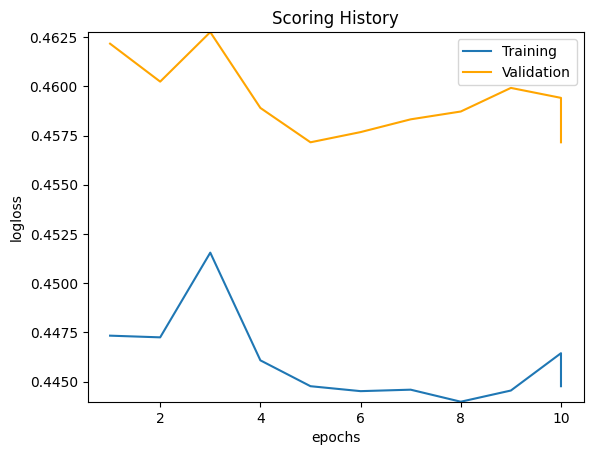

In [33]:
_ = best_ann.plot()

18. Score new row of data

In [36]:
# predict on new data -- REQUIRES STUDENT INPUT
new_row = pd.DataFrame.from_dict({
  "GRP_REP_home_ownership": [1],
  "GRP_addr_state": [20],
  "GRP_purpose": [1],
  "GRP_verification_status": [1],
  "STD_IMP_REP_annual_inc": [4],
  "STD_IMP_REP_delinq_2yrs": [1],
  "STD_IMP_REP_dti": [1],
  "STD_IMP_REP_emp_length": [2],
  "STD_IMP_REP_int_rate": [1],
  "STD_IMP_REP_loan_amnt": [1],
  "STD_IMP_REP_longest_credit_lengt": [1],
  "STD_IMP_REP_revol_util": [1],
  "STD_IMP_REP_term_length":[1],
  "STD_IMP_REP_total_acc": [0]},
  orient='columns')

# Convert the new_row Pandas DataFrame to an H2OFrame
new_row_h2o = h2o.H2OFrame(new_row)

# generate prediction -- REQUIRES STUDENT INPUT
# Pass the H2OFrame to the predict method
best_ann.predict(new_row_h2o)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


predict,0.0,1.0
0,0.798559,0.201441


19. Shutdown h2o

In [ ]:
# shutdown h2o
h2o.cluster().shutdown(prompt=False)